# Health Care Project Day 5

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# PROBLEM STATEMENT 19 - HARIKA
def replace_string(df, column_name, target, replacement):
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return df

    df[column_name] = df[column_name].str.replace(target, replacement)
    return df


ayush = pd.read_csv("AYUSHHospitals.csv", header=[0, 1])
ayush.columns = ['_'.join(col).strip() for col in ayush.columns.values]


column_mappings = [
    (ayush.columns[0], "Srl_no."),
    (ayush.columns[1], "State/UT"),
    (ayush.columns[2], "Number_of_Govt_Hospitals"),
    (ayush.columns[3], "Number_of_Local_Hospitals"),
    (ayush.columns[4], "Number_of_Other_Hospitals"),
    (ayush.columns[5], "Total_No_of_Hospitals"),
    (ayush.columns[6], "Number_of_Govt_HospitalBeds"),
    (ayush.columns[7], "Number_of_Local_HospitalBeds"),
    (ayush.columns[8], "Number_of_Other_HospitalBeds"),
    (ayush.columns[9], "Total_No_of_HospitalBeds")
]


for old_name, new_name in column_mappings:
    ayush.rename(columns={old_name: new_name}, inplace=True)

ayush.drop([0], inplace=True)
ayush.reset_index(drop=True, inplace=True)


ayush = replace_string(ayush, 'State/UT', "&", "and")
ayush['State/UT'] = ayush['State/UT'].replace({"Delhi": "Nct Of Delhi", "Odisha": "Orissa", "Puducherry": "Pondicherry", "Lakshdweep": "Lakshadweep"})

ayush.to_csv("Clean_Data/ayush_hospital_clean.csv",index=False)
print("Successfully saved to the desired path\n\n\n")
print(ayush)

Successfully saved to the desired path



                                         Srl_no.                     State/UT  \
0                                              1               Andhra Pradesh   
1                                              2            Arunachal Pradesh   
2                                              3                        Assam   
3                                              4                        Bihar   
4                                              5                 Chhattisgarh   
5                                              6                 Nct Of Delhi   
6                                              7                          Goa   
7                                              8                      Gujarat   
8                                              9                      Haryana   
9                                             10             Himachal Pradesh   
10                                            11            Jammu a

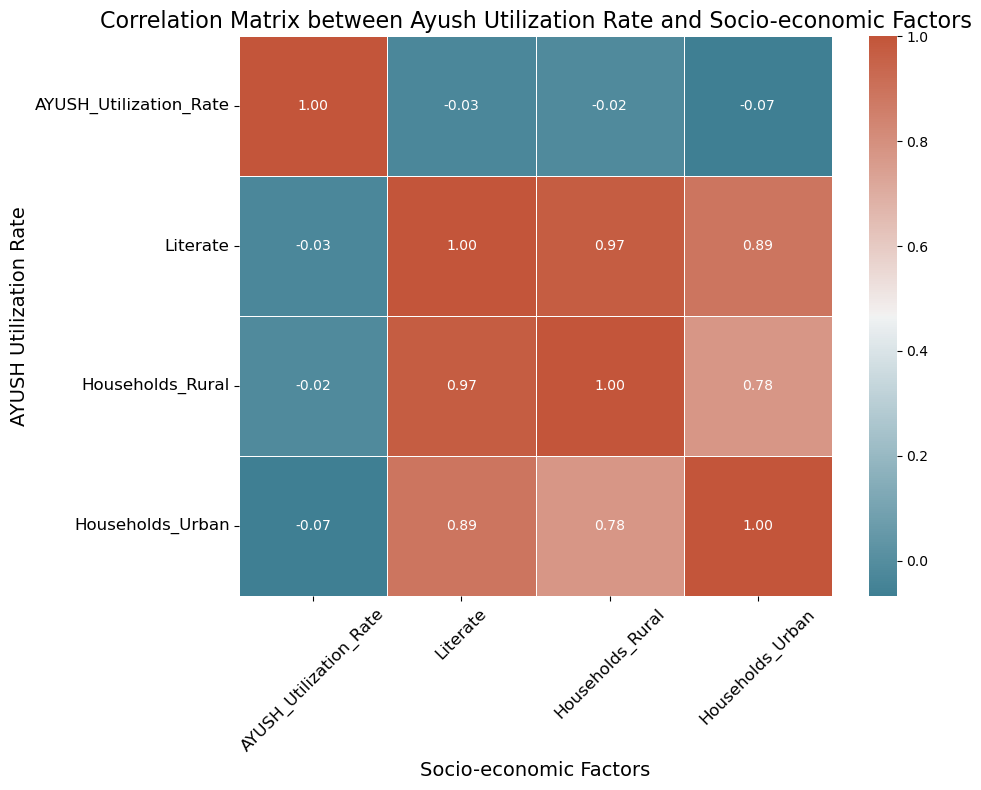

In [23]:
census = pd.read_csv("census (1).csv")
census = census.groupby("State/UT", as_index=False).sum(numeric_only=True)
merged_data = pd.merge(ayush, census, on='State/UT', how='inner')

merged_data['AYUSH_Utilization_Rate'] = merged_data['Total_No_of_Hospitals'] / merged_data['Population']

socio_economic_factors = ['Literate', 'Households_Rural', 'Households_Urban']
correlation_matrix = merged_data[['AYUSH_Utilization_Rate'] + socio_economic_factors].corr()

color_palette = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=color_palette, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Ayush Utilization Rate and Socio-economic Factors', fontsize=16)
plt.xlabel('Socio-economic Factors', fontsize=14)
plt.ylabel('AYUSH Utilization Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

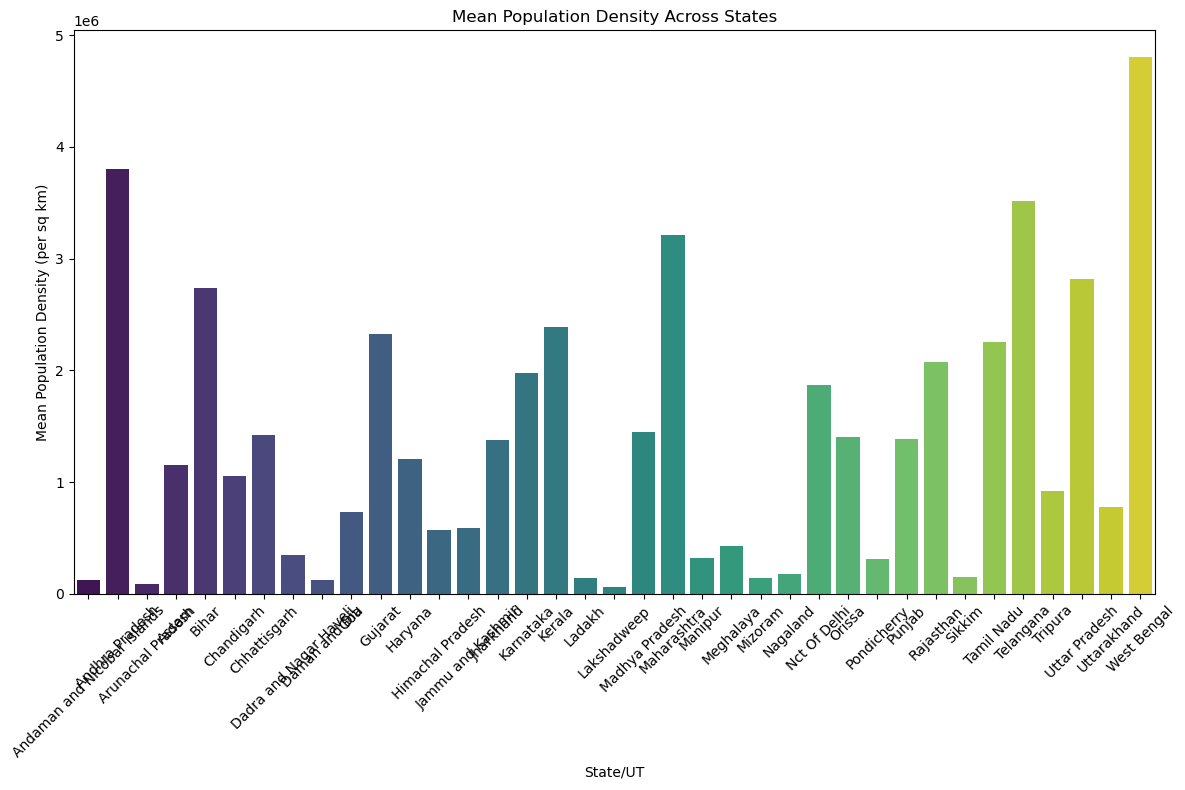

In [24]:
# PROBLEM STATEMENT 20 - HARSHITHA.Y
census_data = pd.read_csv("census (1).csv")

state_population_density = census_data.groupby('State/UT')['Population'].sum() / census_data.groupby('State/UT')['District'].nunique()
census_data['Population Density'] = census_data['Population'] / census_data['State/UT'].map(state_population_density)

state_density_df = pd.DataFrame({ 'State/UT': state_population_density.index, 'Mean Population Density': state_population_density.values})

plt.figure(figsize=(12, 8))
sns.barplot(x='State/UT', y='Mean Population Density', data=state_density_df, palette='viridis')
plt.title('Mean Population Density Across States')
plt.xlabel('State/UT')
plt.ylabel('Mean Population Density (per sq km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


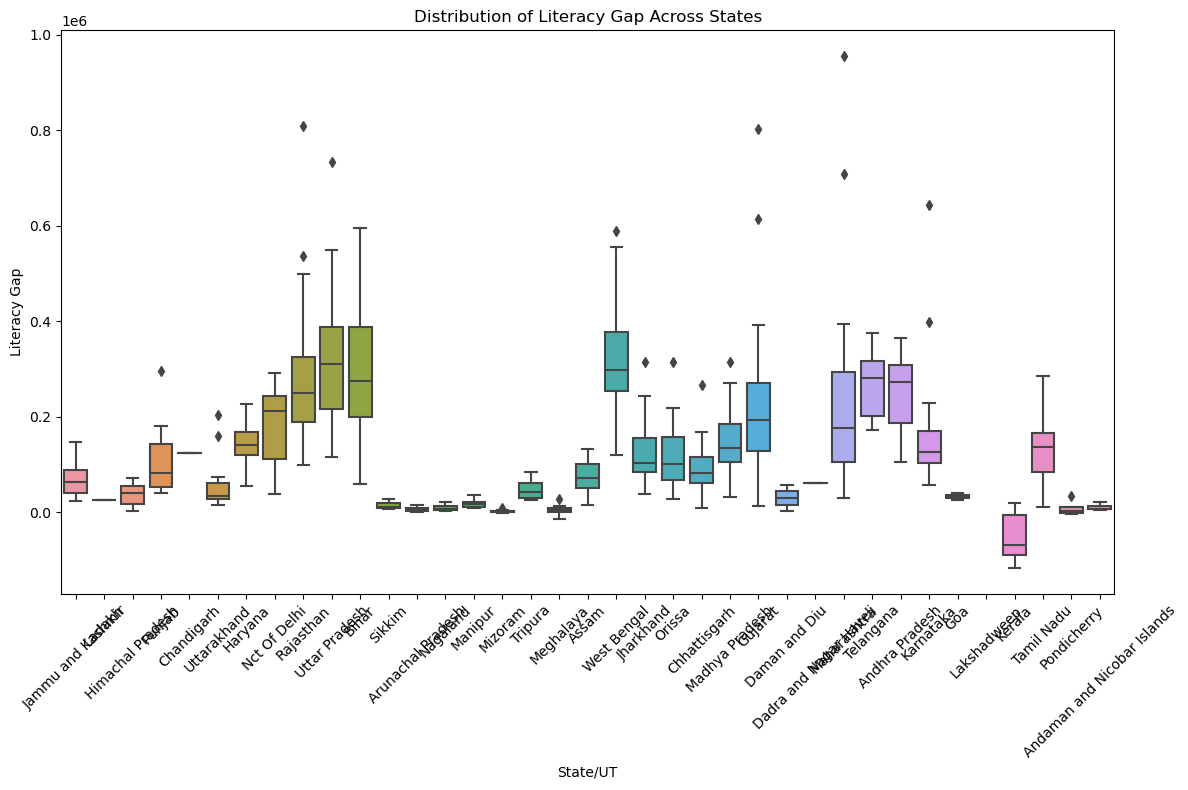

In [25]:
# Problem Statement 21 - AKASH SHRUSTI 
census_data['Literacy Gap'] = census_data['Literate_Male'] - census_data['Literate_Female']

plt.figure(figsize=(12, 8))
sns.boxplot(x='State/UT', y='Literacy Gap', data=census_data)
plt.title('Distribution of Literacy Gap Across States')
plt.xlabel('State/UT')
plt.ylabel('Literacy Gap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [27]:
# PROBLEM STATEMENT 22 - NEEV SHAH
hospital = pd.read_csv("Clean_Data/all_hospitals.csv")
gov_hospitals = pd.read_csv("Clean_Data/government_hospitals.csv")
census = pd.read_csv("Clean_Data/census (1).csv")

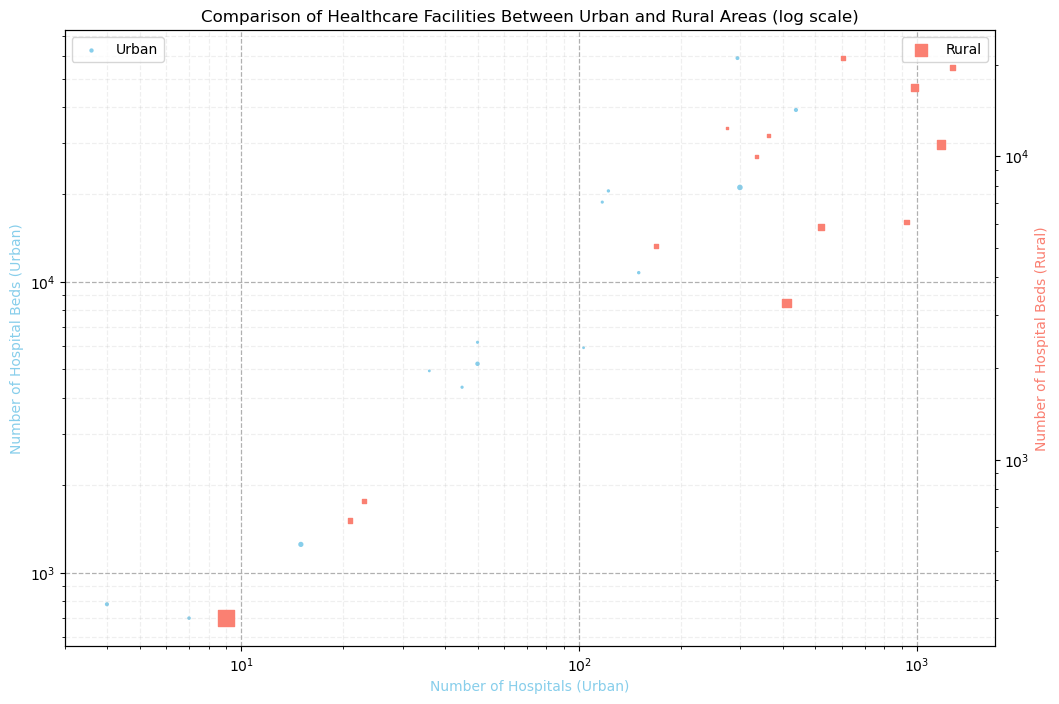

In [28]:
state_population = census.groupby('State/UT')['Population'].sum()
merged_data = pd.merge(hospital, gov_hospitals, on='State/UT')
merged_data = pd.merge(merged_data, state_population, on='State/UT')

urban_per_capita = merged_data['Urban_Government_Hospitals'] / merged_data["Population"]
rural_per_capita = merged_data['Rural_Government_Hospitals'] / merged_data["Population"]

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.scatter(merged_data['Urban_Government_Hospitals'], merged_data['Urban_Government_Beds'],s=urban_per_capita * 999999, color='skyblue', marker='o', label='Urban')
ax1.set_xlabel('Number of Hospitals (Urban)', color='skyblue')
ax1.set_ylabel('Number of Hospital Beds (Urban)', color='skyblue')

ax2 = ax1.twinx()
ax2.scatter(merged_data['Rural_Government_Hospitals'], merged_data['Rural_Government_Beds'],
            s=rural_per_capita * 999999, color='salmon', marker='s', label='Rural')
ax2.set_ylabel('Number of Hospital Beds (Rural)', color='salmon')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')

plt.title('Comparison of Healthcare Facilities Between Urban and Rural Areas (log scale)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(True, which='both', linestyle='--', linewidth=0.9) 
ax1.minorticks_on() 
ax1.grid(which='minor', alpha=0.2)  

plt.show()


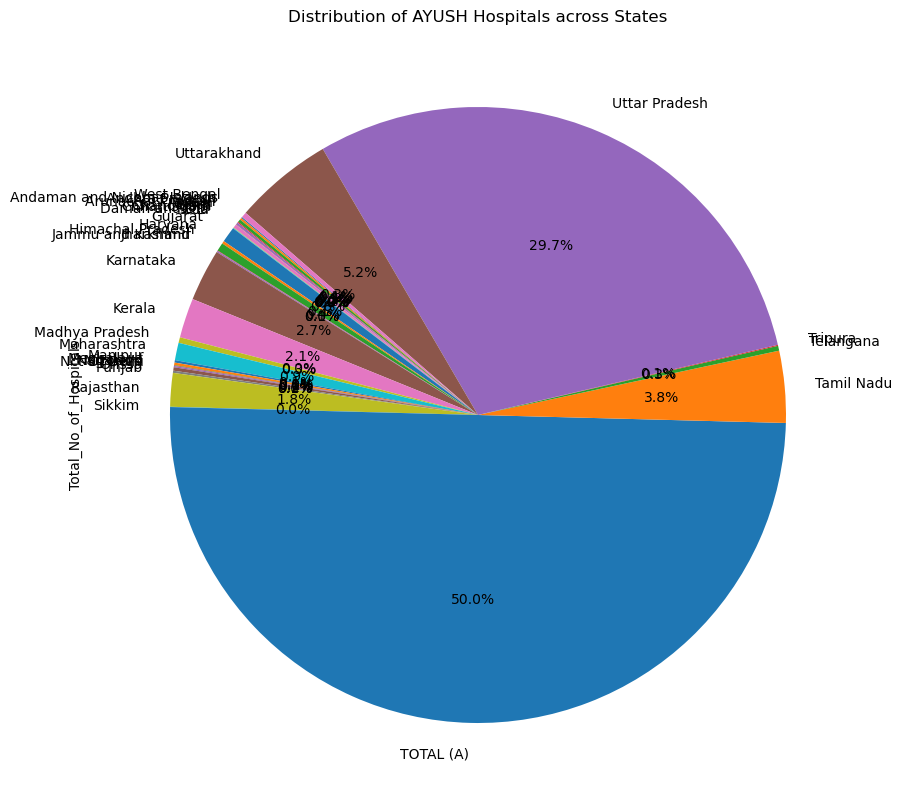

In [30]:
# PROBLEM STATEMENT 23 - HARIKA
data = pd.read_csv("ayush_hospital_clean.csv")

statewise_ayush_hospitals = data.groupby('State/UT')['Total_No_of_Hospitals'].sum()

plt.figure(figsize=(10, 10))
statewise_ayush_hospitals.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AYUSH Hospitals across States')
  

plt.show()


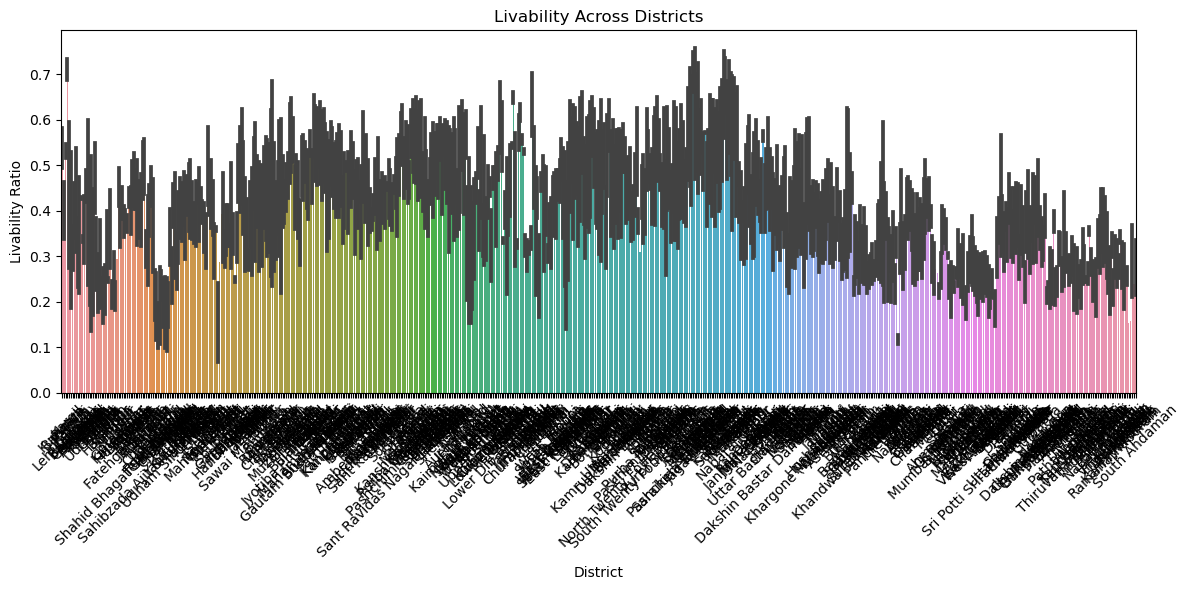

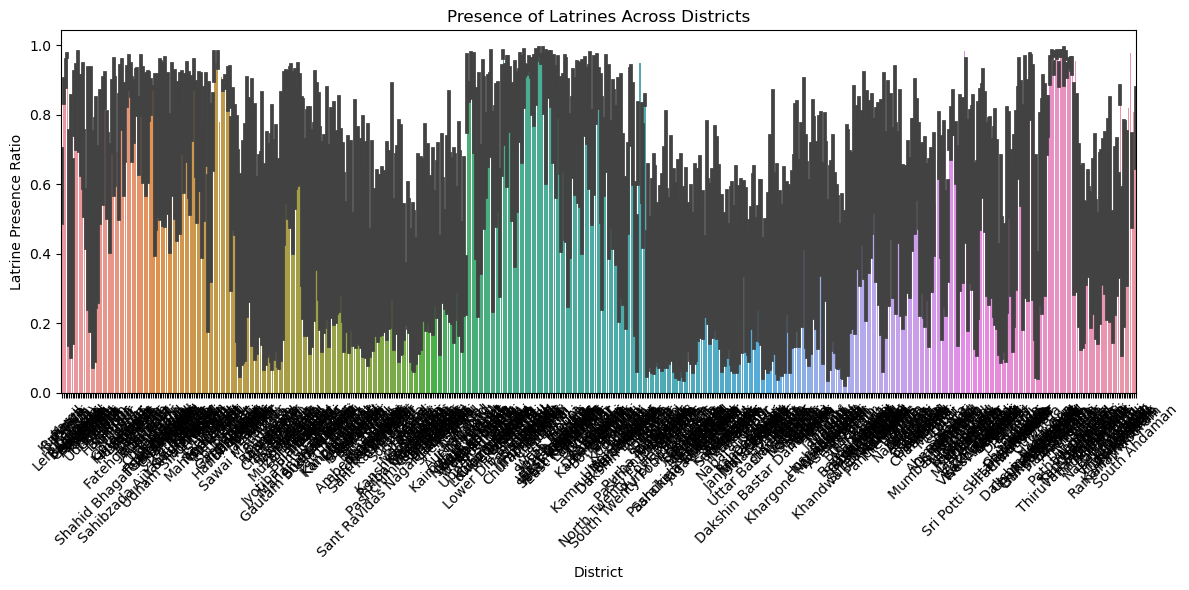

In [31]:
# PROBLEM STATEMENT 24 - HARSHITHA.Y
housing_data = pd.read_csv("Clean_Data/housing.csv")

housing_data['Livability_Ratio'] = housing_data['Total Number of Livable'] / housing_data['Total Number of households']
housing_data['Latrine_Presence_Ratio'] = housing_data['Latrine_premise'] / housing_data['Total Number of households']

plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Livability_Ratio', data=housing_data)
plt.title('Livability Across Districts')
plt.xlabel('District')
plt.ylabel('Livability Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Latrine_Presence_Ratio', data=housing_data)
plt.title('Presence of Latrines Across Districts')
plt.xlabel('District')
plt.ylabel('Latrine Presence Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


State/UT with under-allocation of resources:
             State/UT  Beds_Per_1000
3               Assam       0.612551
4               Bihar       0.170952
6        Chhattisgarh       0.561906
8             Gujarat       0.680497
9             Haryana       0.545965
11  Jammu and Kashmir       0.914641
12          Jharkhand       0.224444
13          Karnataka       0.950796
16     Madhya Pradesh       0.525150
17        Maharashtra       0.614001
18            Manipur       0.897124
21           Nagaland       0.982562
22             Punjab       0.487577
23          Rajasthan       0.756312
26          Telangana       0.493209
28      Uttar Pradesh       0.291824
29        Uttarakhand       0.660302
30        West Bengal       0.560530 /n
State/UT with over-allocation of resources:
                       State/UT  Beds_Per_1000
0   Andaman and Nicobar Islands       3.273942
5                    Chandigarh       3.558672
15                  Lakshadweep       3.877592
20               

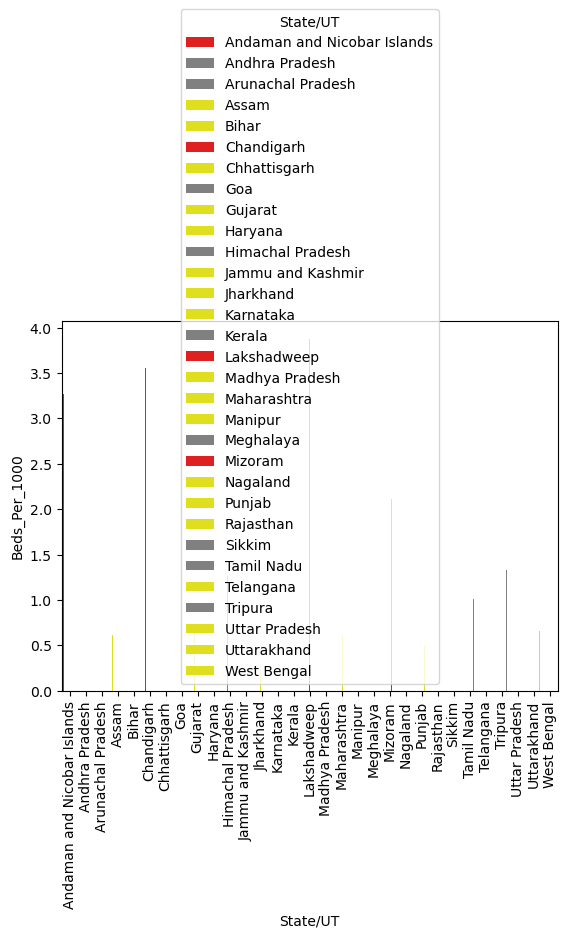

In [39]:
# PROBLEM STATEMENT 25 - AKASH SHRUSTI
hospital_data = pd.read_csv("Clean_Data/all_hospitals.csv")
census_data = pd.read_csv("census (1).csv")
population_data = census_data.groupby("State/UT")["Population"].sum().reset_index()

merged_hpop = pd.merge(hospital_data, population_data, on="State/UT")
merged_hpop["Beds_Per_1000"] = (merged_hpop["Hospital Beds"].astype(float) / merged_hpop["Population"].astype(float)) * 1000

print("State/UT with under-allocation of resources:")
print(merged_hpop[["State/UT", "Beds_Per_1000"]].loc[merged_hpop["Beds_Per_1000"].astype(float) < 1.0], "/n")
print("State/UT with over-allocation of resources:")
print(merged_hpop[["State/UT", "Beds_Per_1000"]].loc[merged_hpop["Beds_Per_1000"].astype(float) > 2.0], "/n")

palette = ["red" if x > 2.0 else "yellow" if x < 1.0 else "grey" for x in merged_hpop["Beds_Per_1000"]]

ax = sns.barplot(x=merged_hpop["State/UT"], y=merged_hpop["Beds_Per_1000"], hue=merged_hpop["State/UT"], palette=palette)
plt.xticks(rotation=90)
plt.show()


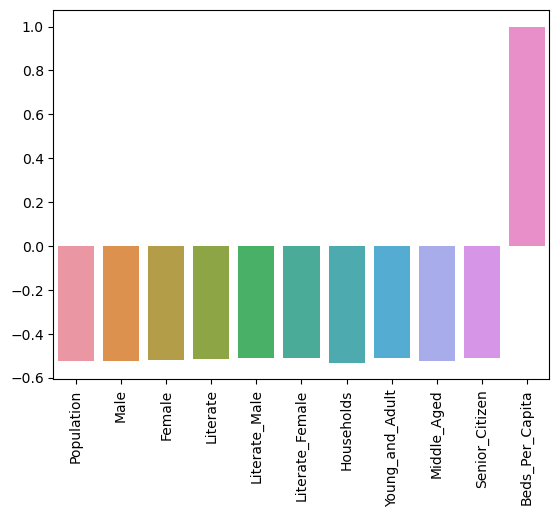

In [41]:
# PROBLEM STATEMENT 26 - NEEV SHAH
census_data = pd.read_csv("census (1).csv")
hospital_data = pd.read_csv("all_hospitals.csv")

required_census = [
    "Population", "Male", "Female", "Literate", "Literate_Male", "Literate_Female",
    "Households", "Young_and_Adult", "Middle_Aged", "Senior_Citizen"
]
grouped_census = census_data.groupby("State/UT")[required_census].sum().reset_index()

merged_hc = pd.merge(hospital_data[["State/UT", "Hospital Beds"]], grouped_census, on="State/UT")
merged_hc["Beds_Per_Capita"] = merged_hc["Hospital Beds"].astype(float) / merged_hc["Population"].astype(float)

capita_correlation = merged_hc.drop("State/UT", axis=1).corr()["Beds_Per_Capita"]

sns.barplot(x=capita_correlation.index, y=capita_correlation.values)
plt.xticks(rotation=90)
plt.show()
